In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\datasets\\Walmart_sales.csv")

In [3]:
raw_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
raw_data.shape

(6435, 8)

##### Checking the null values

In [6]:
raw_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
raw_data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### checkpoint-1

In [8]:
data = raw_data.copy()

#### independent and dependent features

In [9]:
independent_f = data.drop('Weekly_Sales', axis=1)
dependent_f = data['Weekly_Sales']

#### working with date feature

In [10]:
data['Date'].head()

0    05-02-2010
1    12-02-2010
2    19-02-2010
3    26-02-2010
4    05-03-2010
Name: Date, dtype: object

In [11]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [12]:
type(data['Date'])

pandas.core.series.Series

In [13]:
months = []

for i in range(data.shape[0]):
    months.append(data['Date'][i].month)

In [14]:
data['Months'] = months

### EDA

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

C:\Users\hp\AppData\Local\Temp\ipykernel_10732\1645908648.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weekly_Sales'], kde=True)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

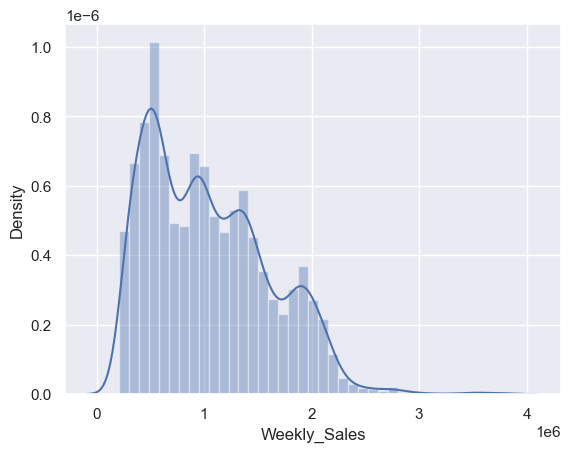

In [16]:
sns.distplot(data['Weekly_Sales'], kde=True)

In [17]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Months'],
      dtype='object')

In [18]:
continous_f = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

other_f = ['Store', 'Date', 'Holiday_Flag']

C:\Users\hp\AppData\Local\Temp\ipykernel_10732\103794339.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True, ax=ax)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tr

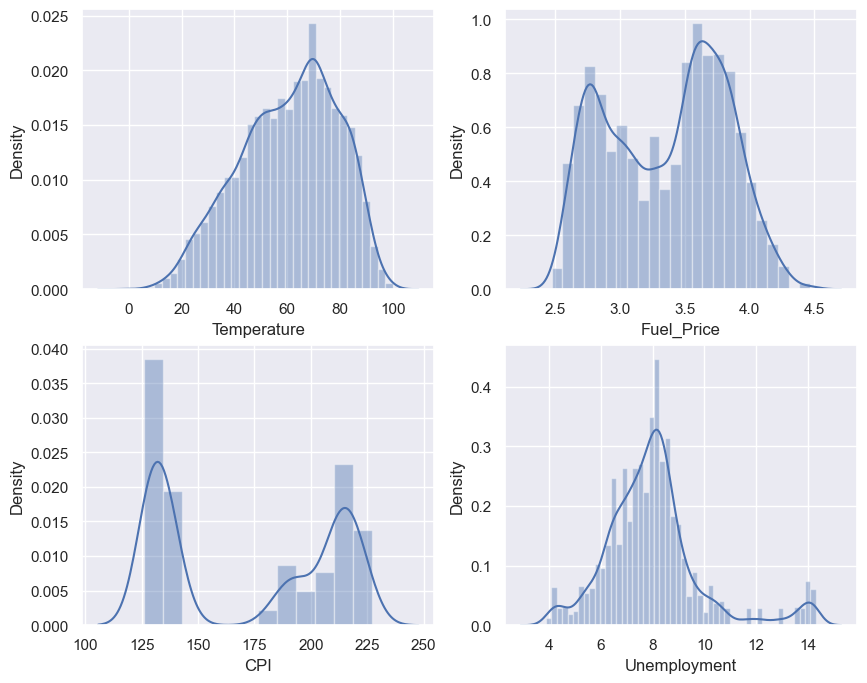

In [19]:
labeling = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for col, ax, label in zip(continous_f, axes.flatten(), labeling):
    sns.distplot(data[col], kde=True, ax=ax)
    plt.grid()


# axes.flatten() converts the 2D array of axes objects into a 1D array

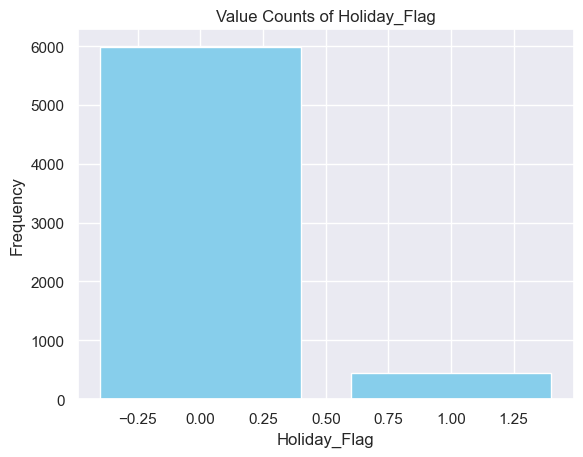

In [20]:
value_counts = data['Holiday_Flag'].value_counts()

plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Holiday_Flag')
plt.ylabel('Frequency')
plt.title('Value Counts of Holiday_Flag')
plt.show()

#### dealing with outliers with the help of boxplot

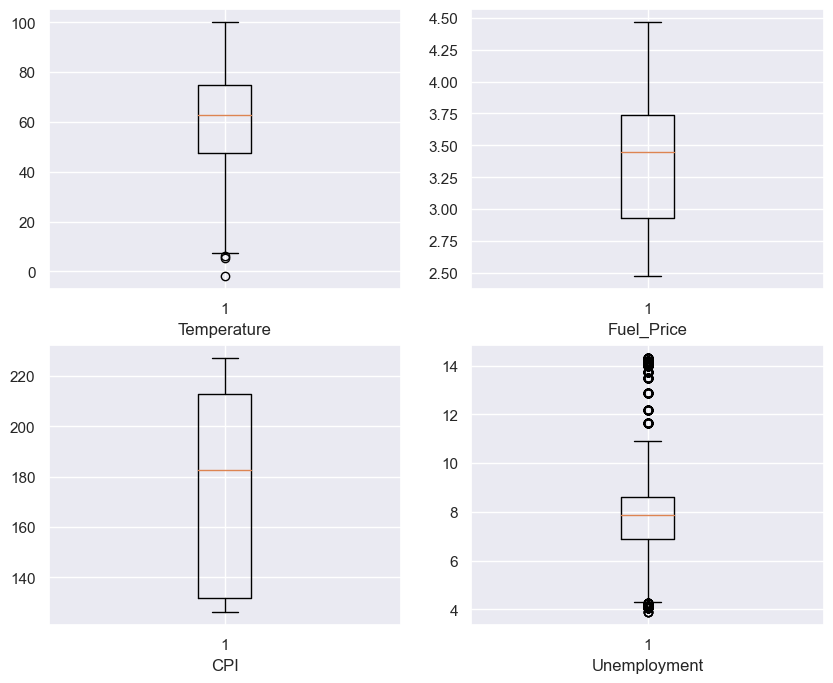

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for col, ax, label in zip(continous_f, axes.flatten(), labeling):
    ax.boxplot(data[col])
    ax.set_xlabel(label)
    plt.grid()

In [22]:
outlier_data = data.copy()

In [23]:
outlier_cols = ['Unemployment', 'Temperature']

def outliers(data, columns):
    for col in columns:
    
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
    
        IQR = Q3 - Q1
    
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        data = data.reset_index(drop=True)
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
        
    return data

cleaned_data = outliers(outlier_data, outlier_cols)

In [24]:
cleaned_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Months
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3


{'whiskers': [<matplotlib.lines.Line2D at 0x2919160a2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2919161ac50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2919143fe90>],
 'medians': [<matplotlib.lines.Line2D at 0x2919161bc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x29191603e50>],
 'means': []}

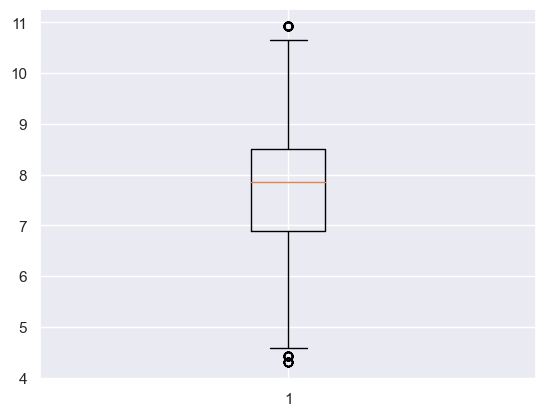

In [25]:
plt.boxplot(cleaned_data['Unemployment'])
# plt.gca().set_facecolor('skyblue')
# plt.grid()

# we removed almost all the outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x29191690850>,
 'caps': [<matplotlib.lines.Line2D at 0x29191691cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29191690090>],
 'medians': [<matplotlib.lines.Line2D at 0x29191693350>],
 'fliers': [<matplotlib.lines.Line2D at 0x29191693d10>],
 'means': []}

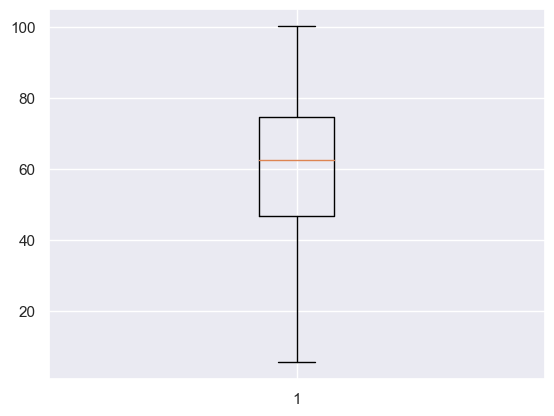

In [26]:
plt.boxplot(cleaned_data['Temperature'])

# there are no outliers

In [27]:
cleaned_data.drop('Date', axis=1, inplace=True)

In [28]:
cleaned_data.isna().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Months          0
dtype: int64

In [29]:
cleaned_data.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Months'],
      dtype='object')

In [30]:
columns = ['Store', 'Months', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
          'CPI', 'Unemployment', 'Weekly_Sales']

cleaned_data = cleaned_data[columns]

In [31]:
cleaned_data.head()

,Store,Months,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,1,2,0,42.31,2.572,211.096358,8.106,1643690.90
1,1,2,1,38.51,2.548,211.242170,8.106,1641957.44
2,1,2,0,39.93,2.514,211.289143,8.106,1611968.17
3,1,2,0,46.63,2.561,211.319643,8.106,1409727.59
4,1,3,0,46.50,2.625,211.350143,8.106,1554806.68


### checking the multicollinearity

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
features =  ['Store', 'Months', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(cleaned_data[features].values, i) for i in range(len(features))]
vif["features"] = features


In [34]:
vif

,VIF,features
0,4.567348,Store
1,5.311414,Months
2,1.136535,Holiday_Flag
3,14.224762,Temperature
4,29.516160,Fuel_Price
5,17.028698,CPI
6,27.586633,Unemployment


Text(0.5, 55.109374999999986, 'Correlation Matrix')

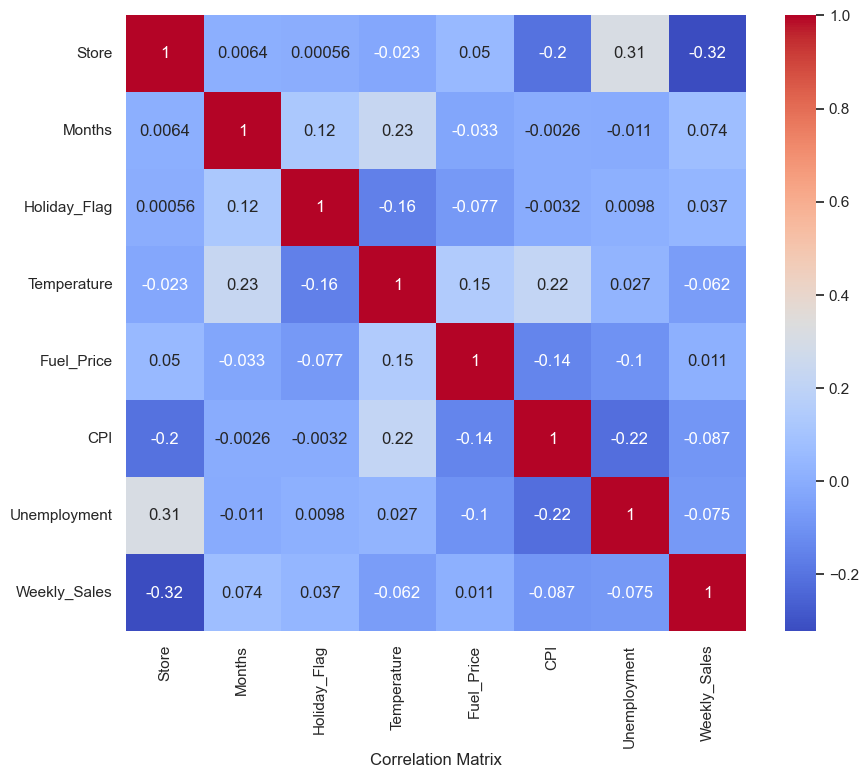

In [35]:
correlation_matrix = cleaned_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xlabel("Correlation Matrix")

#### dropping the 'Fuel_Price' column

In [36]:
cleaned_data.drop('Fuel_Price', axis=1, inplace=True)

In [37]:
independent_f = cleaned_data.drop('Weekly_Sales', axis=1)

dependent_f = cleaned_data['Weekly_Sales']

In [38]:
independent_f.head()

,Store,Months,Holiday_Flag,Temperature,CPI,Unemployment
0,1,2,0,42.31,211.096358,8.106
1,1,2,1,38.51,211.242170,8.106
2,1,2,0,39.93,211.289143,8.106
3,1,2,0,46.63,211.319643,8.106
4,1,3,0,46.50,211.350143,8.106


In [39]:
type(dependent_f)

pandas.core.series.Series

In [40]:
independent_f['CPI'].value_counts()

CPI
130.701290    10
130.932548    10
130.719633    10
130.683000    10
130.719581    10
              ..
214.751084     1
214.815521     1
214.961638     1
215.107755     1
214.741539     1
Name: count, Length: 2145, dtype: int64

#### checkpoint

In [41]:
cleaned_data.head()

,Store,Months,Holiday_Flag,Temperature,CPI,Unemployment,Weekly_Sales
0,1,2,0,42.31,211.096358,8.106,1643690.90
1,1,2,1,38.51,211.242170,8.106,1641957.44
2,1,2,0,39.93,211.289143,8.106,1611968.17
3,1,2,0,46.63,211.319643,8.106,1409727.59
4,1,3,0,46.50,211.350143,8.106,1554806.68


In [42]:
data_cleaned = cleaned_data.copy()

### train_test_split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(independent_f, 
                                                    dependent_f, 
                                                    test_size=0.2,
                                                    random_state=39)

### feature selection

In [45]:
from sklearn.feature_selection import f_regression

In [46]:
f_regression(x_train, y_train)

(array([580.7639553 ,  22.92403366,   6.2846666 ,  15.40002447,
         33.35981118,  23.46567763]),
 array([3.56997342e-121, 1.73642380e-006, 1.22117624e-002, 8.82144380e-005,
        8.14590005e-009, 1.31198156e-006]))

In [47]:
p_values = f_regression(x_train, y_train)[1]

In [48]:
p_values.round(2)

array([0.  , 0.  , 0.01, 0.  , 0.  , 0.  ])

###### from p value of independent features, we can see that Fuel_Price feature has p-value greater than 0.05 we can remove 'Fuel_Price' feature

In [49]:
x_train.columns

Index(['Store', 'Months', 'Holiday_Flag', 'Temperature', 'CPI',
       'Unemployment'],
      dtype='object')

### Feature scaling

In [50]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import scipy.stats as stats

In [51]:
scaler = StandardScaler()
x_fit = scaler.fit(x_train)
train_scaled = scaler.transform(x_train)
test_scaled = scaler.transform(x_test)

In [52]:
# num_features = x_train.shape[1]

# for i in range(num_features):
#     plt.figure(figsize=(10, 8))
#     plt.plot(x_scaled[:, i])
#     plt.title(f"Feature {i+1}")
#     plt.grid(True)
#     plt.show()

In [53]:
# stats.probplot(train_scaled[0], dist=stats.norm)  
# plt.show()

In [54]:
train_scaled[:, 0]

array([ 0.80001292, -0.04325656,  0.34004775, ..., -1.11650862,
       -1.65313465,  0.26338689])

In [55]:
x_train.columns[0]

'Store'

Text(0.5, 1.0, 'CPI before tranformation')

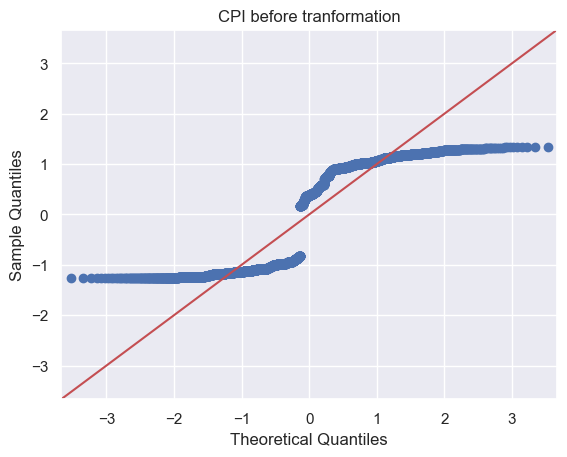

In [56]:
sm.qqplot(x_train.iloc[:, 4], line='45', dist=stats.norm, fit=True)
plt.title(f"{x_train.columns[4]} before tranformation")

Text(0.5, 1.0, 'CPI after transformation')

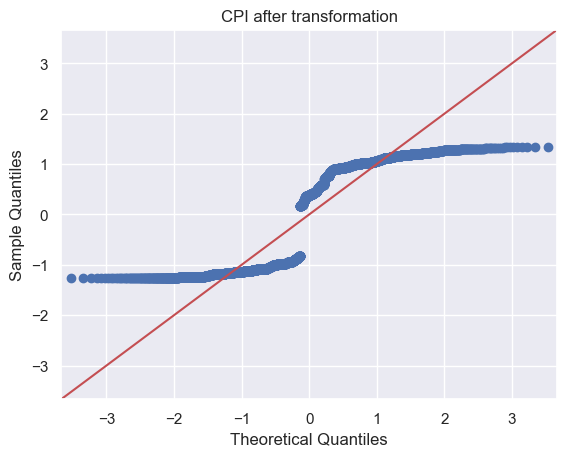

In [57]:
sm.qqplot(train_scaled[:, 4], line='45', dist=stats.norm, fit=True)
plt.title(f"{x_train.columns[4]} after transformation")

### Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(x_train, y_train)

LinearRegression()

In [61]:
y_hat = lr.predict(x_train)

In [62]:
df = pd.DataFrame()
df['Actual value'] = y_train
df['Predicted value'] = y_hat

In [63]:
df['Actual value'][2955]

1167621.14

In [64]:
df['Predicted value'][2955]

1239073.7855222607

In [65]:
predict_y = lr.predict(x_test)

In [66]:
df

,Actual value,Predicted value
4399,286428.78,1.007002e+06
2955,1167621.14,1.239074e+06
3624,1800728.07,1.144134e+06
2269,981210.57,1.225841e+06
2837,722891.24,9.298639e+05
...,...,...
3196,1297535.69,1.206003e+06
2276,849074.04,1.237840e+06
1089,1021400.42,1.186248e+06
105,1802477.43,1.295883e+06


In [67]:
lr.score(x_train, y_train)

0.14086968901016828

In [68]:
lr.score(x_test, y_test)

0.11560151496575011

#### importing the metrics

In [69]:
from sklearn.metrics import r2_score

In [70]:
r2_score(y_test, predict_y)

0.11560151496575011

#### categorical, numerical and target variable

In [71]:
train_num = x_train.iloc[:, 3: ]
train_cat = x_train.iloc[:, :3]
test_num = x_test.iloc[:, 3: ]
test_cat = x_test.iloc[:, :3]

y = dependent_f

In [72]:
x_train = pd.concat([train_cat.reset_index(drop=True), train_num.reset_index(drop=True)], axis=1)
x_test = pd.concat([test_cat.reset_index(drop=True), test_num.reset_index(drop=True)], axis=1)

In [73]:
x_train

,Store,Months,Holiday_Flag,Temperature,CPI,Unemployment
0,33,9,1,92.02,130.932548,7.147
1,22,12,0,49.11,140.430786,7.706
2,27,11,0,49.69,140.411161,7.906
3,17,6,0,62.90,130.792900,6.235
4,21,5,0,79.49,221.382803,6.891
...,...,...,...,...,...,...
4757,24,11,0,48.17,136.466667,8.454
4758,17,8,0,73.29,130.756161,5.936
4759,8,2,1,35.71,223.802451,5.825
4760,1,2,1,48.02,220.265178,7.348


### Ridge Regression

In [74]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [75]:
alphas = [0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0, 5, 10, 15]
rd_reg = RidgeCV(alphas=alphas, cv=10)
rd_reg.fit(x_train, y_train)

RidgeCV(alphas=[0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0, 5, 10, 15], cv=10)

In [76]:
predict = rd_reg.predict(x_train)

In [77]:
rd_reg.score(x_train, y_train)

0.14086915646772402

In [78]:
pred_y = rd_reg.predict(x_test)
r2_ = r2_score(y_test, pred_y)
r2_

0.11559247989699106

### Lasso Regression

In [79]:
from sklearn.linear_model import LassoCV

In [80]:
lasso = LassoCV(cv=30)
lasso.fit(x_train, y_train)

LassoCV(cv=30)

In [81]:
lasso.score(x_train, y_train)

0.14049286416777573

### Polynomial features

polynomial feature is applies for numerical variables

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [83]:
(train_cat + test_cat).columns

Index(['Store', 'Months', 'Holiday_Flag'], dtype='object')

In [84]:
# Defining transformers for numerical and categorical features

numerical_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2))  
])

categorical_transformer = OneHotEncoder()


In [85]:
# Defining preprocessor to apply transformers to appropriate columns

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, train_num.columns),  # Passing the column names directly
    ('cat', categorical_transformer, train_cat.columns)
])

In [86]:
# Defining pipeline including preprocessor and regression model

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regression', LinearRegression())
])


In [87]:
# Fit the pipeline

pipe.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['Temperature', 'CPI', 'Unemployment'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Store', 'Months', 'Holiday_Flag'], dtype='object'))])),
                ('regression', LinearRegression())])

In [88]:
train_score = pipe.score(x_train, y_train)
print("Training score:", train_score)

Training score: 0.9392351931205338


In [89]:
test_score = pipe.score(x_test, y_test)
print("Testing score: ", test_score)

Testing score:  0.9356905218668771


In [90]:
poly_pred = pipe.predict(x_test)

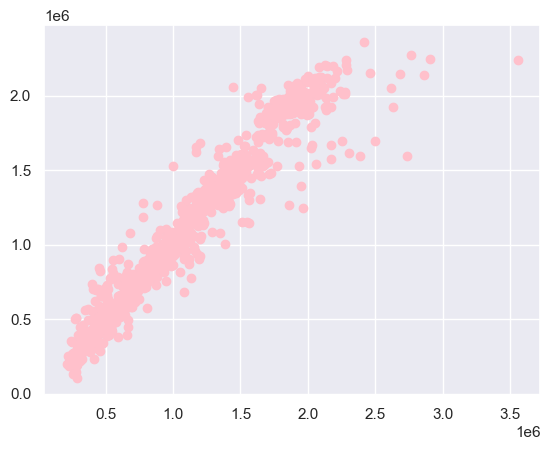

In [91]:
plt.scatter(y_test, poly_pred, color='pink')

### Random Forst Model

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
rf_reg = RandomForestRegressor(max_depth=14, 
                               max_features=5, 
                               max_samples=0.75,
                               n_estimators=100)

In [94]:
rf_reg.fit(x_train, y_train)

RandomForestRegressor(max_depth=14, max_features=5, max_samples=0.75)

In [95]:
y_test_pred_rf = rf_reg.predict(x_test)

In [96]:
rf_reg.score(x_train, y_train)

0.9840797909206536

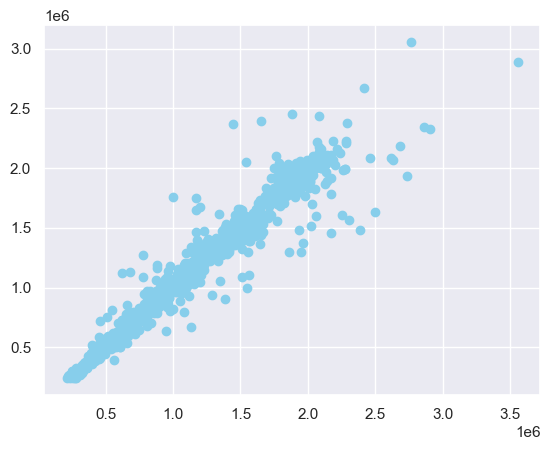

In [97]:
plt.scatter(y_test, y_test_pred_rf, color='skyblue')


### Metrics for Random Forest Regressor

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# for regression model

In [99]:
r2_score(y_test, y_test_pred_rf)

0.9468439165552636

In [100]:
mse = mean_squared_error(y_test, y_test_pred_rf)

rmse = np.sqrt(mse)

rmse

128179.64918860742

In [101]:
mean_absolute_error(y_test, y_test_pred_rf)

67562.54858409805

### Hyperparameter Tuning
### Using Random Search CV

In [102]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
n_estimators = np.arange(20, 150, 5)
max_depth = np.arange(1, 15)
max_features = np.arange(1, len(x_train.columns))
max_samples = [0.4, 0.5, 0.75, 1]

In [104]:
params = {"n_estimators": n_estimators,
          "max_depth": max_depth,
          "max_samples": max_samples,
          "max_features": max_features}

In [105]:
rf_ = RandomForestRegressor()

In [106]:
random_cv = RandomizedSearchCV(rf_,
                               param_distributions=params,
                               cv=10,
                               n_jobs=-1,
                               error_score="raise",
                               random_state=39)
random_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
                   estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': array([1, 2, 3, 4, 5]),
                                        'max_samples': [0.4, 0.5, 0.75, 1],
                                        'n_estimators': array([ 20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,
        85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145])},
                   random_state=39)

In [107]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=14, max_features=5, max_samples=0.5,
                      n_estimators=55)

In [108]:
random_cv.best_score_

0.9436096740080953